In [1]:
import pyspark
from pyspark import SparkContext,SQLContext
sc = SparkContext.getOrCreate()

In [ ]:
bitCoinPrices = sc.textFile('bitcoinprices.txt')

In [ ]:
bitCoinPrices.map(lambda x: x.split(',')).take(10)

In [ ]:
bitCoinPrices=spark.read.csv('bitcoinprices.txt', mode="DROPMALFORMED",inferSchema=True, header = False)

In [ ]:
bitCoinPrices = bitCoinPrices.withColumnRenamed('_c0','date').withColumnRenamed('_c1','price')

In [ ]:
bitCoinPrices.sort('date').head(657)

In [ ]:
tweetSents=spark.read.csv('sentiment6.txt', mode="DROPMALFORMED",inferSchema=True, header = False)

In [ ]:
tweetSents = tweetSents.withColumnRenamed('_c0','date').withColumnRenamed('_c1','SentimentProb')

In [ ]:
tweetSents.sort('date').head(643)

In [ ]:
df1 = flintContext.read.pandas(pd.read_csv(bitcoinprices.txt))

In [3]:
import pandas

In [2]:
df1 = flintContext.read.pandas(pd.read_csv(bitcoinprices.txt))

NameError: name 'flintContext' is not defined

In [4]:
import ts.flint
from ts.flint import FlintContext

ImportError: No module named 'ts'

                             ARIMA Model Results                              
Dep. Variable:                D.427.1   No. Observations:                  655
Model:                ARIMA(10, 1, 0)   Log Likelihood               -5765.509
Method:                       css-mle   S.D. of innovations           1605.919
Date:                Wed, 15 Nov 2017   AIC                          11555.018
Time:                        21:44:04   BIC                          11608.833
Sample:                    06-13-2016   HQIC                         11575.884
                         - 05-24-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2322      7.744      0.030      0.976     -14.946      15.410
ar.L1.D.427.1     -0.9627      0.039    -24.934      0.000      -1.038      -0.887
ar.L2.D.427.1     -0.9628      0.052

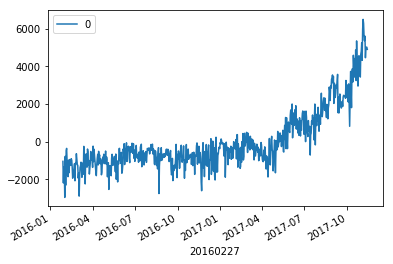

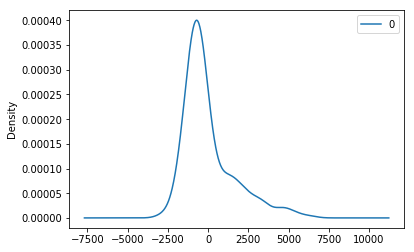

                 0
count   655.000000
mean      4.884351
std    1608.617675
min   -2960.046887
25%    -998.792861
50%    -468.573260
75%     482.996348
max    6497.914552


In [19]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
def parser(x):
    return datetime.strptime(x, '%Y%m%d')

series = read_csv('bitcoinprices.txt', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [44]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import numpy as np
def parser(x):    
    return datetime.strptime(x, '%Y-%m-%d')

series = read_csv('bitcoinsort.csv', header='infer', dtype={'time':np.str,'price':np.float64},parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1131.924869, expected=1160.800000
predicted=1170.547150, expected=1185.400000
predicted=1176.787441, expected=1189.500000
predicted=1205.632655, expected=1186.200000
predicted=1181.409992, expected=1209.500000
predicted=1207.497883, expected=1203.600000
predicted=1198.542001, expected=1228.400000
predicted=1234.204510, expected=1211.700000
predicted=1214.034524, expected=1178.900000
predicted=1179.338993, expected=1180.600000
predicted=1186.100887, expected=1188.700000
predicted=1188.088996, expected=1171.800000
predicted=1184.020209, expected=1193.000000
predicted=1190.549582, expected=1196.400000
predicted=1191.032111, expected=1219.000000
predicted=1218.158646, expected=1248.900000
predicted=1250.968988, expected=1249.900000
predicted=1247.991102, expected=1250.000000
predicted=1255.063327, expected=1254.200000
predicted=1251.173412, expected=1267.000000
predicted=1273.833156, expected=1290.300000
predicted=1294.878080, expected=1318.100000
predicted=1317.511181, expected=

In [30]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
def parser(x):
    return datetime.strptime(x, '%Y%m%d')

y = read_csv('bitcoinprices.txt', header=None,names=['time','price'], parse_dates=[0], index_col=False, squeeze=True, date_parser=parser)
y.head()


,time,price
0,2016-02-27,427.1
1,2016-11-18,750.9
2,2016-06-13,690.9
3,2016-08-08,588.7
4,2017-02-06,1047.3


In [42]:
#x=y.sort(["time"])
x = y.sort_values('time',axis=0)
x.to_csv('bitcoinsort.csv', index=False)

Test MSE: 32409.630


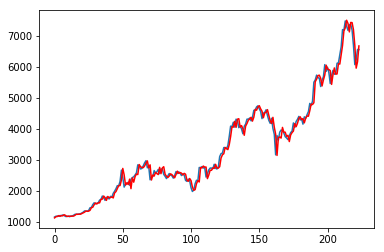

In [45]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()